In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SEIHQRD(y,t,N,ye,yinf):
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    w=0.019 #Tasa de fatalidad del virus
    wu=w #Tasa de fatalidad para no detectados
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    teta=0.35837 #Proporción de infectados detectados
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=0.7229 #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>41.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=0.7080
        me=0.693554262
        miu=0.482486993
        mid=0.466126264
        mhr=0.199387429
        mhd=0.199931628
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>55.01:
        yhd=1/7
    if t>71.01:
        teta=0.8139
        me=0.587470322
        miu=0.332486993
        mid=0.316126264
        mhr=0.300223233
        mhd=0.300042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=0.8139
        me=0.507470322
        miu=0.252486993
        mid=0.236126264
        mhr=0.230223233
        mhd=0.230042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.009
    if t>119.01 and t<120.01:
        print(D)
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [3]:
S=8119853
E=1828
I=320
Iu=594
Hr=81
Hd=8
Rd=234
Ru=200
D=5
N=8125072
Q=1930
Idu=12
Du=7
ye=0.1818
yinf=0.0714
t=np.linspace(0,275,6500)
ans=scipy.integrate.odeint(SEIHQRD,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans=np.array(ans)

7358.937799225073
7358.937798951643
7365.390581832524
7365.390581944643
7371.722726930274
7371.722726803609


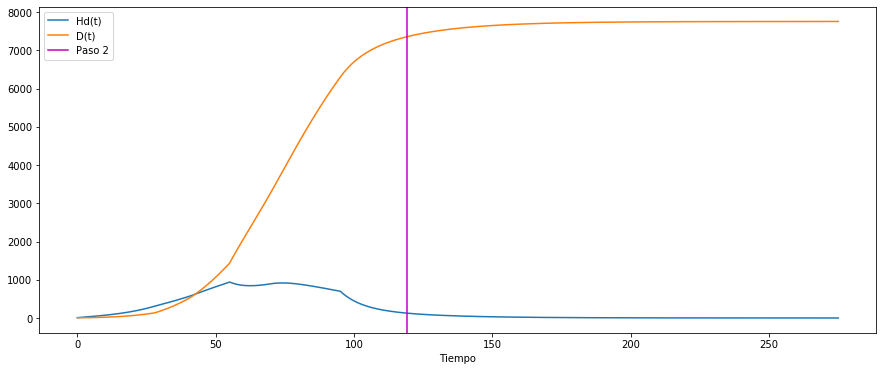

In [4]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,6],label="Hd(t)")
plt.plot(t,ans[:,11],label="D(t)")
#plt.plot(118, 9693,'ro',label='Fallecidos hoy')
#plt.plot(118, 2547,'go',label='Hospitalizados que falleceran')
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

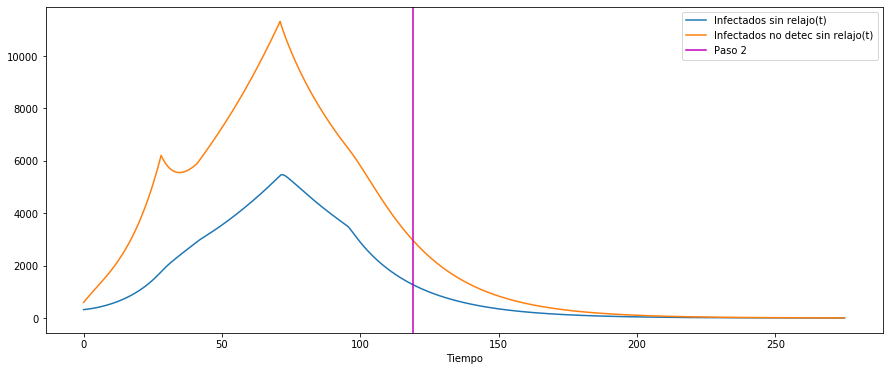

In [5]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans[:,3],label="Infectados no detec sin relajo(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

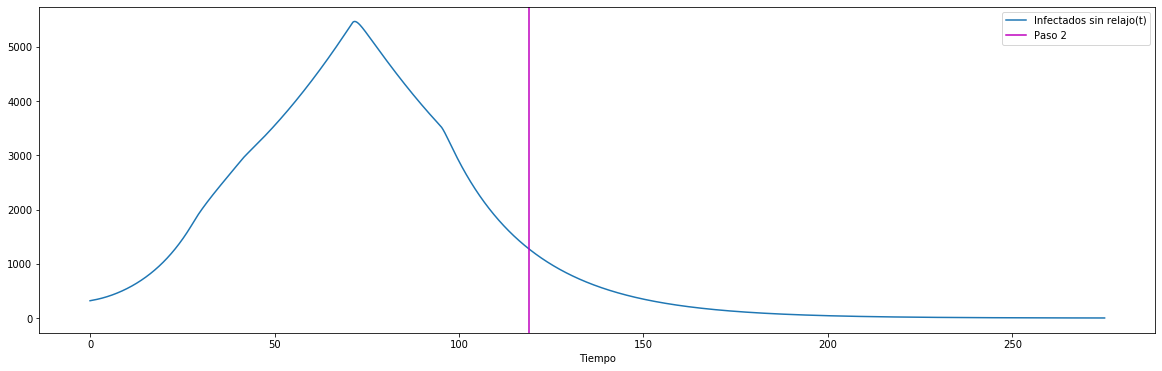

In [6]:
plt.figure(figsize=[20,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [7]:
def SEIHQRD2(y,t,N,ye,yinf): #Caso de relajar medidas en 0.05
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    w=0.019 #Tasa de fatalidad del virus
    wu=w #Tasa de fatalidad para no detectados
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    teta=0.35837 #Proporción de infectados detectados
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=0.7229 #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>41.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=0.7080
        me=0.693554262
        miu=0.482486993
        mid=0.466126264
        mhr=0.199387429
        mhd=0.199931628
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>55.01:
        yhd=1/7
    if t>71.01:
        teta=0.8139
        me=0.587470322
        miu=0.332486993
        mid=0.316126264
        mhr=0.300223233
        mhd=0.300042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=0.8139
        me=0.507470322
        miu=0.252486993
        mid=0.236126264
        mhr=0.230223233
        mhd=0.230042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.009
    if t>119:
        w=0.00976
        teta=0.7080
        me=0.557
        miu=0.3024
        mid=0.286
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [8]:
S=8119853
E=1828
I=320
Iu=594
Hr=81
Hd=8
Rd=234
Ru=200
D=5
N=8125072
Q=1930
Idu=12
Du=7
ye=0.1818
yinf=0.0714
t=np.linspace(0,275,6500)
ans2=scipy.integrate.odeint(SEIHQRD2,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans2=np.array(ans2)

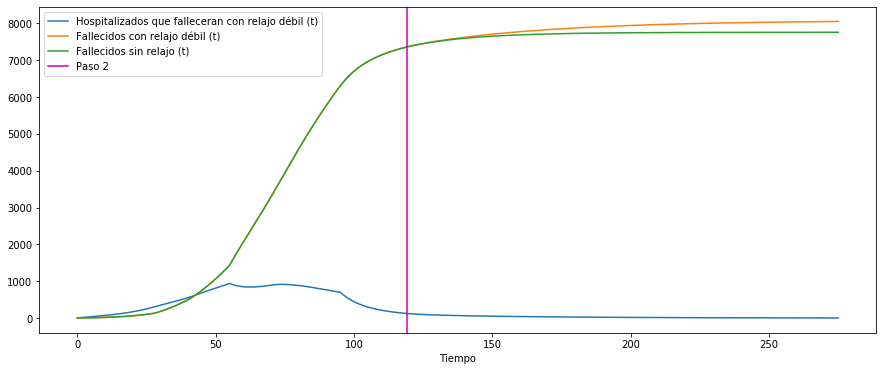

In [9]:
plt.figure(figsize=[15,6])
plt.plot(t,ans2[:,6],label="Hospitalizados que falleceran con relajo débil (t)")
plt.plot(t,ans2[:,11],label="Fallecidos con relajo débil (t)")
plt.plot(t,ans[:,11],label="Fallecidos sin relajo (t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

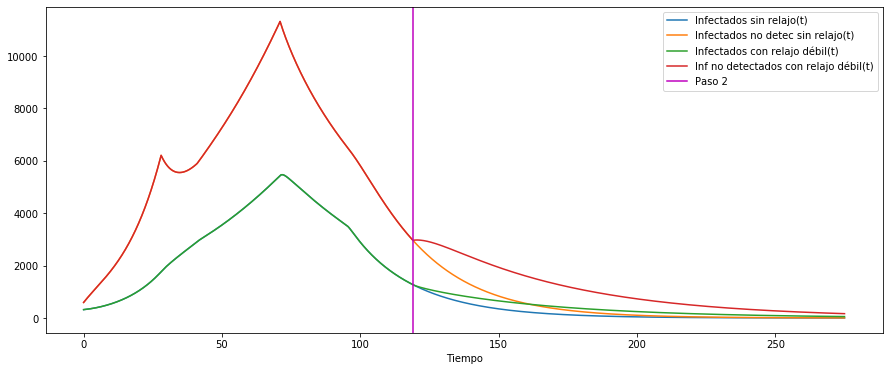

In [10]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans[:,3],label="Infectados no detec sin relajo(t)")
plt.plot(t,ans2[:,2],label="Infectados con relajo débil(t)")
plt.plot(t,ans2[:,3],label="Inf no detectados con relajo débil(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

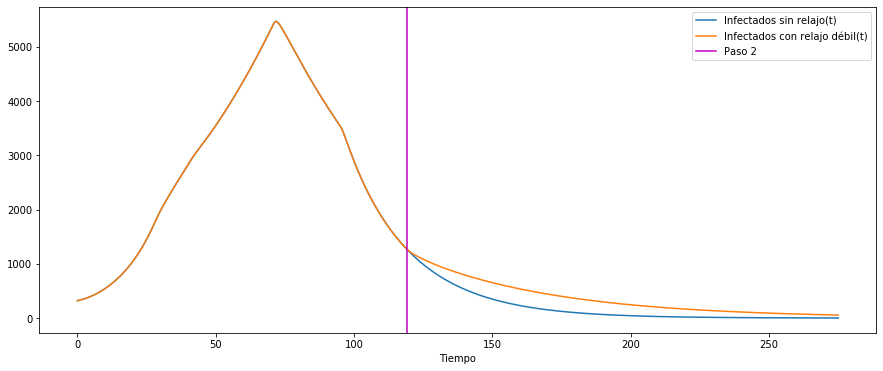

In [11]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans2[:,2],label="Infectados con relajo débil(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [12]:
def SEIHQRD3(y,t,N,ye,yinf): #Caso de relajar medidas en 0.1
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    w=0.019 #Tasa de fatalidad del virus
    wu=w #Tasa de fatalidad para no detectados
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    teta=0.35837 #Proporción de infectados detectados
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=0.7229 #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>41.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=0.7080
        me=0.693554262
        miu=0.482486993
        mid=0.466126264
        mhr=0.199387429
        mhd=0.199931628
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>55.01:
        yhd=1/7
    if t>71.01:
        teta=0.8139
        me=0.587470322
        miu=0.332486993
        mid=0.316126264
        mhr=0.300223233
        mhd=0.300042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=0.8139
        me=0.507470322
        miu=0.252486993
        mid=0.236126264
        mhr=0.230223233
        mhd=0.230042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.009
    if t>119:
        w=0.00976
        teta=0.7080
        me=0.6074
        miu=0.3524
        mid=0.336
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    if int(I//1) not in lR:
          lR.append(int(I))
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [13]:
S=8119853
E=1828
I=320
Iu=594
Hr=81
Hd=8
Rd=234
Ru=200
D=5
N=8125072
Q=1930
Idu=12
Du=7
ye=0.1818
yinf=0.0714
t=np.linspace(0,275,6500)
ans3=scipy.integrate.odeint(SEIHQRD3,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans3=np.array(ans3)

NameError: name 'lR' is not defined

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans[:,3],label="Infectados no detec sin relajo(t)")
plt.plot(t,ans2[:,2],label="Infectados con relajo débil(t)")
plt.plot(t,ans2[:,3],label="Inf no detectados con relajo débil(t)")
plt.plot(t,ans3[:,2],label="Infectados con relajo medio(t)")
plt.plot(t,ans3[:,3],label="Inf no detectados con relajo medio(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans[:,3],label="Infectados no detec sin relajo(t)")
plt.plot(t,ans3[:,2],label="Infectados con relajo medio(t)")
plt.plot(t,ans3[:,3],label="Inf no detectados con relajo medio(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans3[:,2],label="Infectados con relajo medio(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans3[:,6],label="Hospitalizados que falleceran con relajo medio (t)")
plt.plot(t,ans3[:,11],label="Fallecidos con relajo medio (t)")
plt.plot(t,ans[:,11],label="Fallecidos sin relajo (t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans2[:,2],label="Infectados con relajo débil(t)")
plt.plot(t,ans3[:,2],label="Infectados con relajo medio(t)")
plt.axvline(x=119, color='m',label='Paso 1')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
def SEIHQRD4(y,t,N,ye,yinf): #Caso de relajar medidas en 0.15
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    w=0.019 #Tasa de fatalidad del virus
    wu=w #Tasa de fatalidad para no detectados
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    teta=0.35837 #Proporción de infectados detectados
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=0.7229 #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>41.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=0.7080
        me=0.693554262
        miu=0.482486993
        mid=0.466126264
        mhr=0.199387429
        mhd=0.199931628
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>55.01:
        yhd=1/7
    if t>71.01:
        teta=0.8139
        me=0.587470322
        miu=0.332486993
        mid=0.316126264
        mhr=0.300223233
        mhd=0.300042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=0.8139
        me=0.507470322
        miu=0.252486993
        mid=0.236126264
        mhr=0.230223233
        mhd=0.230042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.009
    if t>119:
        w=0.00976
        teta=0.7080
        me=0.6574
        miu=0.4024
        mid=0.386
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [ ]:
S=8119853
E=1828
I=320
Iu=594
Hr=81
Hd=8
Rd=234
Ru=200
D=5
N=8125072
Q=1930
Idu=12
Du=7
ye=0.1818
yinf=0.0714
t=np.linspace(0,275,6500)
ans4=scipy.integrate.odeint(SEIHQRD4,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans4=np.array(ans4)

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans2[:,2],label="Infectados con relajo débil(t)")
plt.plot(t,ans3[:,2],label="Infectados con relajo medio(t)")
plt.plot(t,ans4[:,2],label="Infectados con relajo fuerte(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans4[:,3],label="Inf no detectados con relajo fuerte(t)")
plt.plot(t,ans[:,3],label="Inf no detectados sin relajo(t)")
plt.plot(t,ans4[:,2],label="Infectados con relajo fuerte(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans4[:,6],label="Hospitalizados que falleceran con relajo fuerte (t)")
plt.plot(t,ans4[:,11],label="Fallecidos con relajo fuerte (t)")
plt.plot(t,ans[:,11],label="Fallecidos sin relajo (t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")


plt.plot(t,ans4[:,2],label="Infectados con relajo fuerte(t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
def SEIHQRD5(y,t,N,ye,yinf): #Caso de dejar las medidas en 1
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    w=0.019 #Tasa de fatalidad del virus
    wu=w #Tasa de fatalidad para no detectados
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    teta=0.35837 #Proporción de infectados detectados
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=0.7229 #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>41.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=0.7080
        me=0.693554262
        miu=0.482486993
        mid=0.466126264
        mhr=0.199387429
        mhd=0.199931628
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>55.01:
        yhd=1/7
    if t>71.01:
        teta=0.8139
        me=0.587470322
        miu=0.332486993
        mid=0.316126264
        mhr=0.300223233
        mhd=0.300042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=0.8139
        me=0.507470322
        miu=0.252486993
        mid=0.236126264
        mhr=0.230223233
        mhd=0.230042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.009
    if t>119:
        w=0.00976
        teta=0.7080
        me=1 #El valor de 1 en la medida de control implica que la medida es 100% inefectiva o no hay medida
        miu=1
        mid=1
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [ ]:
S=8119853
E=1828
I=320
Iu=594
Hr=81
Hd=8
Rd=234
Ru=200
D=5
N=8125072
Q=1930
Idu=12
Du=7
ye=0.1818
yinf=0.0714
t=np.linspace(0,275,6500)
ans5=scipy.integrate.odeint(SEIHQRD5,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans5=np.array(ans5)

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans2[:,2],label="Infectados con relajo débil(t)")
plt.plot(t,ans3[:,2],label="Infectados con relajo medio(t)")
plt.plot(t,ans4[:,2],label="Infectados con relajo fuerte(t)")
plt.plot(t,ans5[:,2],label="Infectados con relajo total(t)")
plt.axvline(x=149, color='m',label='Paso 1')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans5[:,6],label="Hospitalizados que falleceran con relajo total (t)")
plt.plot(t,ans5[:,11],label="Fallecidos con relajo total (t)")
plt.plot(t,ans[:,11],label="Fallecidos sin relajo (t)")
plt.axvline(x=119, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans5[:,2],label="Infectados con relajo total(t)")
plt.plot(t,ans5[:,3],label="Inf no detectados con relajo total(t)")
plt.plot(t,ans[:,3],label="Inf no detectados sin relajo(t)")
plt.axvline(x=119, color='m',label='Paso 1')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans5[:,2],label="Infectados con relajo total(t)")

plt.axvline(x=119, color='m',label='Paso 1')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
def SEIHQRD6(y,t,N,ye,yinf): #Caso de postergar desconfinamiento en 30 días
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    w=0.019 #Tasa de fatalidad del virus
    wu=w #Tasa de fatalidad para no detectados
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    teta=0.35837 #Proporción de infectados detectados
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=0.7229 #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>41.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=0.7080
        me=0.693554262
        miu=0.482486993
        mid=0.466126264
        mhr=0.199387429
        mhd=0.199931628
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>55.01:
        yhd=1/7
    if t>71.01:
        teta=0.8139
        me=0.587470322
        miu=0.332486993
        mid=0.316126264
        mhr=0.300223233
        mhd=0.300042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=0.8139
        me=0.507470322
        miu=0.252486993
        mid=0.236126264
        mhr=0.230223233
        mhd=0.230042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.009
    if t>149: #En lugar de desconfinar el 28 de julio postergarlo en 30 días
        w=0.00976
        teta=0.7080
        me=0.6074
        miu=0.3524
        mid=0.3361
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [ ]:
S=8119853
E=1828
I=320
Iu=594
Hr=81
Hd=8
Rd=234
Ru=200
D=5
N=8125072
Q=1930
Idu=12
Du=7
ye=0.1818
yinf=0.0714
t=np.linspace(0,275,6500)
ans6=scipy.integrate.odeint(SEIHQRD6,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans6=np.array(ans6)

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans6[:,6],label="Hospitalizados que falleceran con relajo medio (t)")
plt.plot(t,ans6[:,11],label="Fallecidos con relajo medio (t)")
plt.plot(t,ans[:,11],label="Fallecidos sin relajo (t)")
plt.axvline(x=149, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans[:,3],label="Infectados no detec sin relajo(t)")
plt.plot(t,ans6[:,2],label="Infectados con relajo medio(t)")
plt.plot(t,ans6[:,3],label="Inf no detectados con relajo medio(t)")
plt.axvline(x=149, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans6[:,2],label="Infectados con relajo medio(t)")
plt.axvline(x=149, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
def SEIHQRD7(y,t,N,ye,yinf): #Caso de postergar desconfinamiento en 60 días
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    w=0.019 #Tasa de fatalidad del virus
    wu=w #Tasa de fatalidad para no detectados
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    teta=0.35837 #Proporción de infectados detectados
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=0.7229 #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>41.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=0.7080
        me=0.693554262
        miu=0.482486993
        mid=0.466126264
        mhr=0.199387429
        mhd=0.199931628
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>55.01:
        yhd=1/7
    if t>71.01:
        teta=0.8139
        me=0.587470322
        miu=0.332486993
        mid=0.316126264
        mhr=0.300223233
        mhd=0.300042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=0.8139
        me=0.507470322
        miu=0.252486993
        mid=0.236126264
        mhr=0.230223233
        mhd=0.230042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.009
    if t>179: #En lugar de desconfinar el 28 de julio postergarlo en 60 días
        w=0.00976
        teta=0.7080
        me=0.6074
        miu=0.3524
        mid=0.3361
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [ ]:
S=8119853
E=1828
I=320
Iu=594
Hr=81
Hd=8
Rd=234
Ru=200
D=5
N=8125072
Q=1930
Idu=12
Du=7
ye=0.1818
yinf=0.0714
t=np.linspace(0,275,6500)
ans7=scipy.integrate.odeint(SEIHQRD7,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans7=np.array(ans7)

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans7[:,6],label="Hospitalizados que falleceran con relajo medio (t)")
plt.plot(t,ans7[:,11],label="Fallecidos con relajo medio (t)")
plt.plot(t,ans[:,11],label="Fallecidos sin relajo (t)")
plt.axvline(x=179, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans[:,3],label="Infectados no detec sin relajo(t)")
plt.plot(t,ans7[:,2],label="Infectados con relajo medio(t)")
plt.plot(t,ans7[:,3],label="Inf no detectados con relajo medio(t)")
plt.axvline(x=179, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans7[:,2],label="Infectados con relajo medio(t)")
plt.axvline(x=179, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
def SEIHQRD8(y,t,N,ye,yinf): #Caso de postergar desconfinamiento en 90 días
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    w=0.019 #Tasa de fatalidad del virus
    wu=w #Tasa de fatalidad para no detectados
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    teta=0.35837 #Proporción de infectados detectados
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=0.7229 #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>41.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=0.7080
        me=0.693554262
        miu=0.482486993
        mid=0.466126264
        mhr=0.199387429
        mhd=0.199931628
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>55.01:
        yhd=1/7
    if t>71.01:
        teta=0.8139
        me=0.587470322
        miu=0.332486993
        mid=0.316126264
        mhr=0.300223233
        mhd=0.300042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=0.8139
        me=0.507470322
        miu=0.252486993
        mid=0.236126264
        mhr=0.230223233
        mhd=0.230042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.009
    if t>209: #En lugar de desconfinar el 28 de julio postergarlo en 90 días
        w=0.00976
        teta=0.7080
        me=0.6074
        miu=0.3524
        mid=0.3361
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [ ]:
S=8119853
E=1828
I=320
Iu=594
Hr=81
Hd=8
Rd=234
Ru=200
D=5
N=8125072
Q=1930
Idu=12
Du=7
ye=0.1818
yinf=0.0714
t=np.linspace(0,275,6500)
ans8=scipy.integrate.odeint(SEIHQRD8,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans8=np.array(ans8)

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans8[:,6],label="Hospitalizados que falleceran con relajo medio (t)")
plt.plot(t,ans8[:,11],label="Fallecidos con relajo medio (t)")
plt.plot(t,ans[:,11],label="Fallecidos sin relajo (t)")
plt.axvline(x=200, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans[:,3],label="Infectados no detec sin relajo(t)")
plt.plot(t,ans8[:,2],label="Infectados con relajo medio(t)")
plt.plot(t,ans8[:,3],label="Inf no detectados con relajo medio(t)")
plt.axvline(x=200, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")

plt.plot(t,ans8[:,2],label="Infectados con relajo medio(t)")

plt.axvline(x=200, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")
plt.plot(t,ans2[:,2],label="Infectados con relajo débil (t)")
plt.plot(t,ans3[:,2],label="Infectados con relajo medio (t)")
plt.plot(t,ans4[:,2],label="Infectados con relajo fuerte (t)")
plt.plot(t,ans7[:,2],label="Infectados con relajo medio post 1 mes (t)")
plt.plot(t,ans8[:,2],label="Infectados con relajo medio post 2 meses (t)")
#plt.axvline(x=149, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
def SEIHQRD11(y,t,N,ye,yinf): #Aumento gradual del relajo de las medidas
    S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D=y
    me=0.58889915 #medida de control aplicada a los expuestos en t0 (1 de abril de 2020)
    miu=0.418343253 #medida de control aplicada a los infectados no detectados en t0
    mid=0.41370334 #medida de control aplicada a los infectados detectados en t0
    mhr=0.2994201 #medida de control aplicada a los hospitalizados que se recuperaran en t0
    mhd=0.29990032 #medida de control aplicada a los hospitalizados que falleceran en t0
    bid=0.302230547 #tasa de contagio por estar en contacto con alguien infectado
    ce=0.903887292
    cu=0.871018708
    ch=0.139375658
    be=ce*bid #tasa de contagio por estar en contacto con alguien expuesto
    biu=cu*bid #tasa de contagio por estar en contacto con alguien asintomatico
    bhd=ch*bid #tasa de contagio por estar en contacto con un hospitalizado
    bhr=bhd
    yhd=0.037475687 #días de transición (días**-1) de un hospitalizado a estado D
    yhr=0.078839256 #días de transición (días**-1) de un hospitalizado a estado Q
    yi=1 #días de transición (días**-1) de un infectado a estado a Iu,Q,Hr,Hd
    yiu=1/9 #días de transición (días**-1) de un infectado no detectado a estado Ru
    w=0.019 #Tasa de fatalidad del virus
    wu=w #Tasa de fatalidad para no detectados
    yidu=1/10 #días de transición (días**-1) de un infectado no detectado al estado D
    teta=0.35837 #Proporción de infectados detectados
    yq=1/14 #días de transición (días**-1) de alguien en cuarentena al estado R (días impuestos por autoridad)
    p=0.028 #probabilidad de un infectado de ser hospitalizado
    if t>28.01: #a partir del 28 de abril se aplica relajo de medidas por llamado a la nueva normalidad
        teta=0.7229 #Proporción de infectados detectados cambia en función de saturación sistema atención
        me=0.652410404
        miu=0.432222681
        mid=0.403307236
        mhr=0.299865256
        mhd=0.300033437
        ce=0.873104031
        cu=0.869448088
        ch=0.137222316
        bid=0.272203775
        yhd=1/14 #días de un hospitalizado a D disminuyen a medida que se satura el sistema
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.022 #tasa de fatalidad aumenta con saturación del sistema
    if t>41.01: #11 de mayo se reaplican medidas tras aumento de contagios en abril
        teta=0.7080
        me=0.693554262
        miu=0.482486993
        mid=0.466126264
        mhr=0.199387429
        mhd=0.199931628
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.238821633
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        yhd=1/12
        w=0.02622
    if t>55.01:
        yhd=1/7
    if t>71.01:
        teta=0.8139
        me=0.587470322
        miu=0.332486993
        mid=0.316126264
        mhr=0.300223233
        mhd=0.300042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.02457
    if t>95: #14 de julio caida de fatalidad en espera de nuevos datos
        teta=0.8139
        me=0.507470322
        miu=0.252486993
        mid=0.236126264
        mhr=0.230223233
        mhd=0.230042725
        ce=0.898357762
        cu=0.870867463
        ch=0.139281752
        bid=0.242728381
        be=ce*bid
        biu=cu*bid
        bhd=ch*bid
        bhr=bhd
        w=0.009
    if t>119: 
        w=0.00976
        teta=0.7080
        me=0.5574
        miu=0.3024
        mid=0.2861
    if t>133:
        w=0.00976
        teta=0.7080
        me=0.6074
        miu=0.3524
        mid=0.3361
    if t>147:
        w=0.00976
        teta=0.7080
        me=0.6574
        miu=0.4024
        mid=0.3861
    dS_dt=-(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)
    dE_dt=(S/N)*(me*be*E+miu*biu*Iu+mid*bid*I+mhr*bhr*Hr+mhd*bhd*Hd)-ye*E
    dI_dt=ye*E-yi*I
    dIu_dt=(1-teta-wu)*yi*I-yiu*Iu
    dIdu_dt=wu*yi*I-yidu*Idu
    dHr_dt=p*(teta-w)*yi*I-yhr*Hr
    dHd_dt=w*yi*I-yhd*Hd
    dQ_dt=(1-p)*(teta-w)*yi*I+yhr*Hr-yq*Q
    dRd_dt=yq*Q
    dRu_dt=yiu*Iu
    dDu_dt=yidu*Idu
    dD_dt=yhd*Hd
    return(dS_dt,dE_dt,dI_dt,dIu_dt,dIdu_dt,dHr_dt,dHd_dt,dQ_dt,dRd_dt,dRu_dt,dDu_dt,dD_dt)

In [ ]:
S=8119853
E=1828
I=320
Iu=594
Hr=81
Hd=8
Rd=234
Ru=200
D=5
N=8125072
Q=1930
Idu=12
Du=7
ye=0.1818
yinf=0.0714
t=np.linspace(0,275,6500)
ans11=scipy.integrate.odeint(SEIHQRD11,[S,E,I,Iu,Idu,Hr,Hd,Q,Rd,Ru,Du,D],t,args=(N,ye,yinf))
ans11=np.array(ans11)

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans[:,2],label="Infectados sin relajo(t)")

plt.plot(t,ans11[:,2],label="Infectados con Fases(t)")

plt.axvline(x=119, color='m',label='Paso 2')
plt.axvline(x=133, color='m',label='Paso 3')
plt.axvline(x=147, color='m',label='Paso 4')
plt.legend()
plt.xlabel("Tiempo")
plt.show()

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(t,ans11[:,6],label="Hospitalizados que falleceran con relajo medio (t)")
plt.plot(t,ans11[:,11],label="Fallecidos con relajo medio (t)")
plt.plot(t,ans[:,11],label="Fallecidos sin relajo (t)")
plt.axvline(x=200, color='m',label='Paso 2')
plt.legend()
plt.xlabel("Tiempo")
plt.show()